In [4]:
import numpy as np
import os
import cv2
import shutil
import random as rn
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Rescaling


In [5]:
data_dir = r'D:\Ai\flowers'


In [6]:
print(os.listdir('D:\\Ai\\flowers'))


['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [7]:
batch_size=32
img_height=180
img_width=180


In [8]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)


Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [9]:
vald_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)


Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [10]:
class_name=train_ds.class_names
print(class_name)


['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


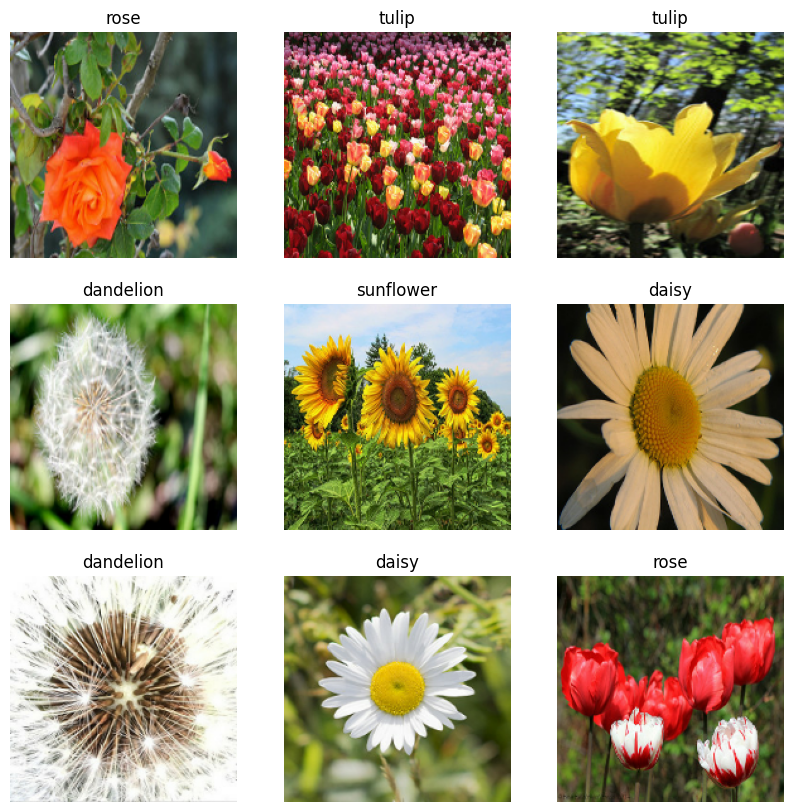

In [11]:
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_name[labels[i]])
        plt.axis("off")
        

In [12]:
for image_batch,labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(32, 180, 180, 3)
(32,)


In [13]:
normalization_layer = Rescaling(1./255)


In [14]:
normalized_ds=train_ds.map(lambda x,y:(normalization_layer(x),y))
image_batch,labels_batch=next(iter(normalized_ds))
first_image=image_batch[0]
print(np.min(first_image),np.max(first_image))


0.0 1.0


In [15]:
num_classes = 5 
model = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width,3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)  
])


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [17]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=vald_ds,
  epochs=epochs
)


Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 36s 310ms/step - accuracy: 0.3156 - loss: 1.5076 - val_accuracy: 0.5087 - val_loss: 1.1175
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 199ms/step - accuracy: 0.5594 - loss: 1.0605 - val_accuracy: 0.5968 - val_loss: 1.0354
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 213ms/step - accuracy: 0.6393 - loss: 0.9522 - val_accuracy: 0.6419 - val_loss: 0.9415
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 201ms/step - accuracy: 0.6804 - loss: 0.8092 - val_accuracy: 0.6605 - val_loss: 0.9301
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - accuracy: 0.7341 - loss: 0.6840 - val_accuracy: 0.6848 - val_loss: 0.8785
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/step - accuracy: 0.7752 - loss: 0.5760 - val_accuracy: 0.6419 - val_loss: 1.1623
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 206ms/step - accuracy: 0.8483 - loss: 0.4172 - val_accuracy: 0.6593 - val_loss: 1.2581
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - accuracy: 0.9005 - loss: 0

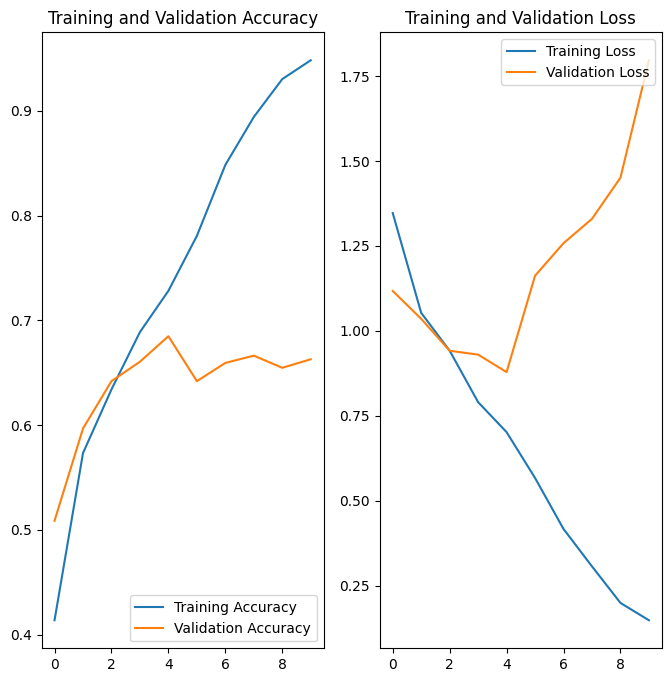

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [19]:
from tensorflow.keras.layers import RandomZoom,RandomFlip,RandomRotation
data_augmentation = keras.Sequential(
  [
    RandomFlip("horizontal", input_shape=(img_height, img_width,  3)),
    RandomRotation(0.1),
    RandomZoom(0.1),
  ]
)


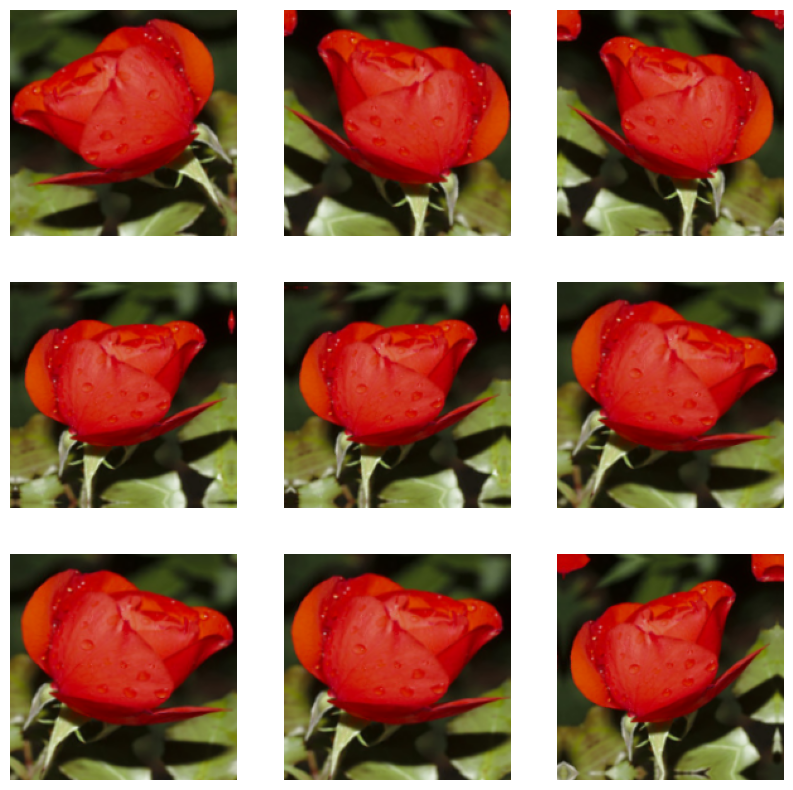

In [20]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
    

In [21]:
model = Sequential([
  data_augmentation,
  Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [22]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [24]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=vald_ds,
  epochs=epochs
)



Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 25s 218ms/step - accuracy: 0.2774 - loss: 1.6729 - val_accuracy: 0.5261 - val_loss: 1.1906
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 216ms/step - accuracy: 0.5597 - loss: 1.1109 - val_accuracy: 0.6118 - val_loss: 1.0217
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 215ms/step - accuracy: 0.6200 - loss: 0.9721 - val_accuracy: 0.6501 - val_loss: 0.9133
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 215ms/step - accuracy: 0.6496 - loss: 0.9087 - val_accuracy: 0.6593 - val_loss: 0.9127
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 215ms/step - accuracy: 0.6746 - loss: 0.8476 - val_accuracy: 0.6431 - val_loss: 0.9025
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 213ms/step - accuracy: 0.6729 - loss: 0.8348 - val_accuracy: 0.6651 - val_loss: 0.8655
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 214ms/step - accuracy: 0.6971 - loss: 0.7678 - val_accuracy: 0.6732 - val_loss: 0.8665
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 216ms/step - accuracy: 0.7126 - loss: 0

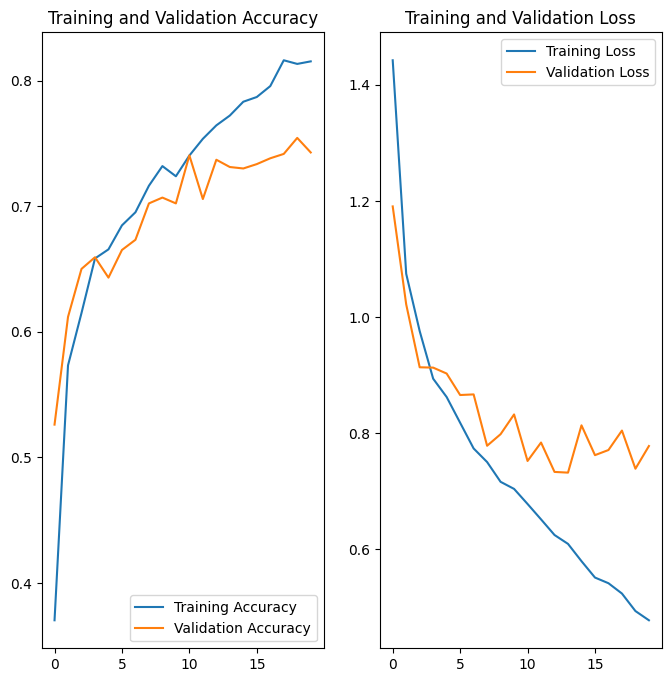

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


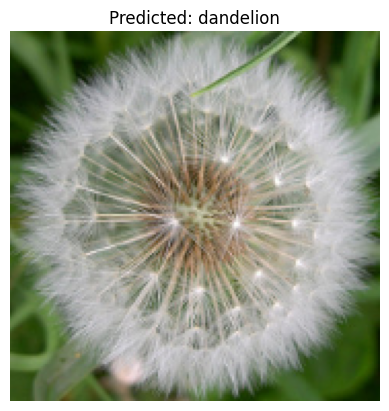

The predicted flower type is: dandelion


In [30]:
img_path = r'D:\Ai\flowers\dandelion\13920113_f03e867ea7_m.jpg'
img = cv2.imread(img_path)
if img is None:
    raise ValueError(f"Image not found at path: {img_path}")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (img_height, img_width))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
predicted_class_name = class_names[predicted_class]
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_name}")
plt.axis("off")
plt.show()
print(f"The predicted flower type is: {predicted_class_name}")

hello
